<a href="https://colab.research.google.com/github/vigneshlakshh/vigneshlakshh/blob/main/twitter%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Binary Classification Using Twitter Dataset**





In [24]:
import pandas as pd
df = pd.read_csv("train_tweets.csv")
print(df.shape)
df.head(5)


(31962, 3)


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [25]:
df['label'].value_counts()  #class Imbalance Problem

0    29720
1     2242
Name: label, dtype: int64

In [26]:
import spacy
import en_core_web_sm
nlp = spacy.load("en_core_web_sm")

In [27]:
df['vector'] = df['tweet'].apply(lambda tweet: nlp(tweet).vector)   #converting to word vectors

In [28]:
df.head()

,id,label,tweet,vector
0,1,0,@user when a father is dysfunctional and is s...,"[0.3674951, -0.03180114, 0.024350673, -0.18112..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[0.23307125, 0.3111073, 0.06079278, -0.2954473..."
2,3,0,bihday your majesty,"[0.3480823, -0.13080284, 0.06577067, 0.4119443..."
3,4,0,#model i love u take with u all the time in ...,"[0.2602855, 0.3505139, 0.14023858, -0.2120796,..."
4,5,0,factsguide: society now #motivation,"[0.61038417, 0.24175006, -0.2700962, -0.265596..."


In [39]:
from sklearn.model_selection import train_test_split   

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.label,
    test_size=0.2,
    random_state=2022
)  #Using 80/20 Split

In [30]:
X_train.shape

(25569,)

In [31]:
X_test.shape

(6393,)

In [32]:
X_train  #numpy array[numpp array]

array([array([ 3.22558463e-01, -1.17277980e-01,  1.26811966e-01, -2.60251164e-01,
              -2.71721721e-01,  4.28155422e-01,  7.49485612e-01,  8.76033381e-02,
               2.17697382e-01, -2.13242605e-01,  7.33557343e-02,  4.61697392e-03,
              -2.68352807e-01, -2.01983333e-01,  1.49291724e-01,  1.44533709e-01,
               6.65193081e-01, -9.07505024e-03,  9.70265090e-01, -5.02444446e-01,
               3.56804758e-01, -1.83513775e-01,  2.89625023e-02,  2.30032459e-01,
               8.20633173e-02,  5.52534401e-01,  1.17836051e-01,  1.10106973e-03,
              -5.79832971e-01, -1.62090063e-01, -4.99912687e-02,  8.97240639e-01,
              -3.94324094e-01, -1.43488199e-01, -4.77855086e-01,  4.37922806e-01,
              -2.03296587e-01, -2.44831413e-01, -2.78741360e-01,  1.43230513e-01,
               2.64797360e-01,  3.37168455e-01, -1.22578414e-02, -3.06479514e-01,
              -8.90882760e-02, -1.50175780e-01, -1.25377864e-01,  4.43920285e-01,
              -1

In [33]:
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [34]:
X_train_2d #after converting 

array([[ 0.32255846, -0.11727798,  0.12681197, ...,  0.12357333,
         0.09377183,  0.12865189],
       [ 0.50350285, -0.321476  , -0.20036872, ...,  0.34703344,
         0.42356598, -0.4621856 ],
       [ 0.32011202, -0.00871058,  0.12701899, ...,  0.69469935,
         0.14419274, -0.38433895],
       ...,
       [ 0.9549934 ,  0.24891225,  0.36335814, ...,  0.4993716 ,
         0.33118638, -0.08990987],
       [ 0.5346471 ,  0.04319641, -0.4407041 , ...,  1.7289006 ,
         0.4858577 ,  0.12171689],
       [ 0.1195332 , -0.00211951, -0.19224732, ..., -0.02313359,
         0.05527056, -0.17837325]], dtype=float32)

**1.MultinomialNB**

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)                ##scaling to fit negative values


clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [36]:
y_pred = clf.predict(scaled_test_embed)
from sklearn.metrics import classification_report
print(classification_report (y_test, y_pred))



              precision    recall  f1-score   support

           0       0.93      1.00      0.96      5960
           1       0.00      0.00      0.00       433

    accuracy                           0.93      6393
   macro avg       0.47      0.50      0.48      6393
weighted avg       0.87      0.93      0.90      6393



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**2.KNeighborsClassifier**


In [37]:
from  sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
clf.fit(X_train_2d, y_train)
y_pred = clf.predict(X_test_2d)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5960
           1       0.76      0.23      0.35       433

    accuracy                           0.94      6393
   macro avg       0.85      0.61      0.66      6393
weighted avg       0.93      0.94      0.93      6393



Text(69.0, 0.5, 'Truth')

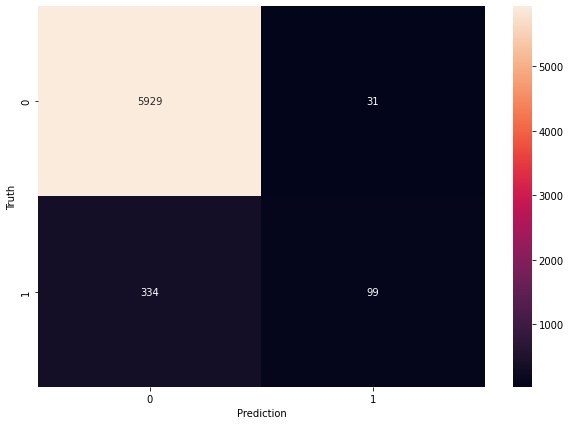

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')